<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/predicting_houses_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [20]:
!pip install --upgrade scikit-learn

In [23]:
houses = pd.read_csv("BostonHousing.csv")  #/ house_price = sklearn.datasets.load_boston

In [24]:
print(houses)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [25]:
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
houses.shape

(506, 14)

In [27]:
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


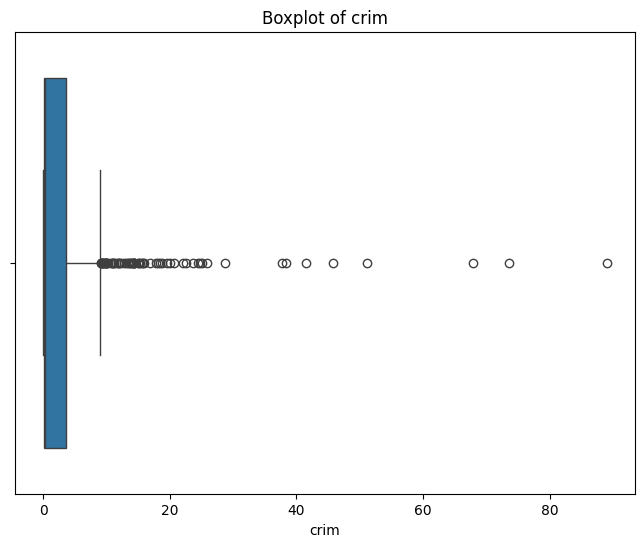

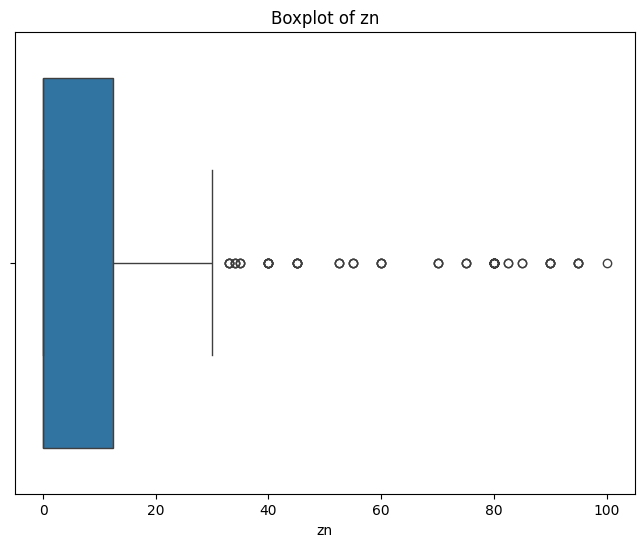

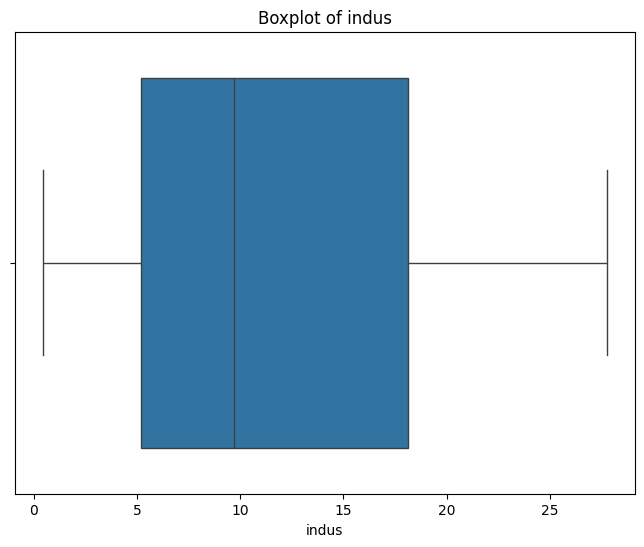

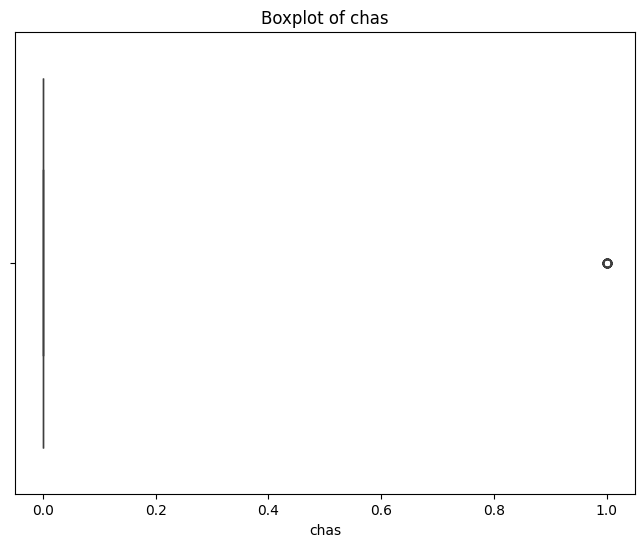

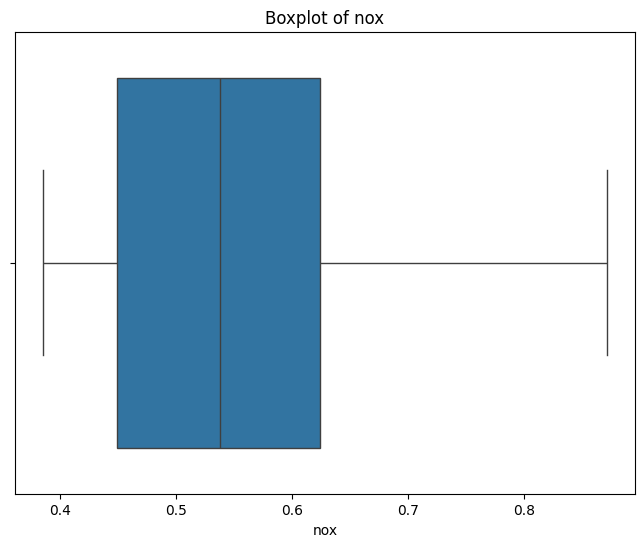

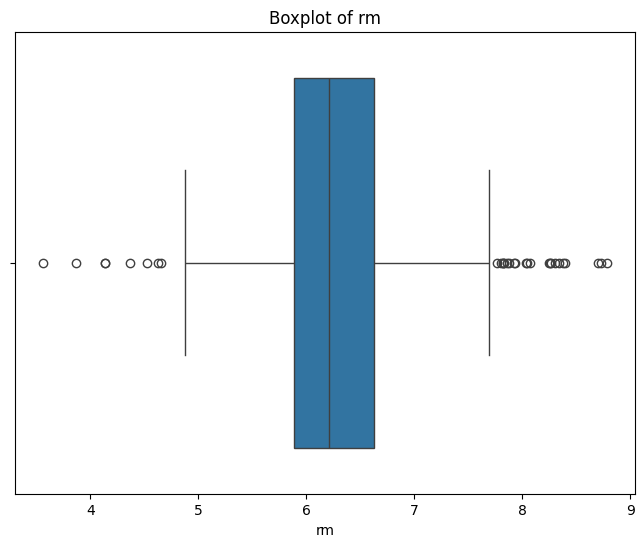

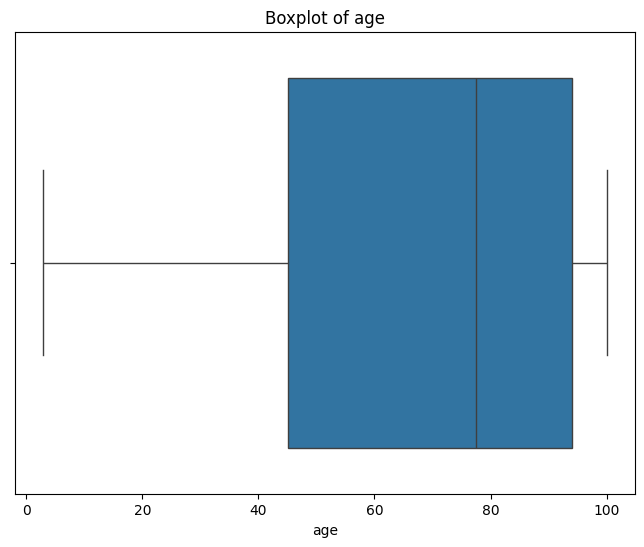

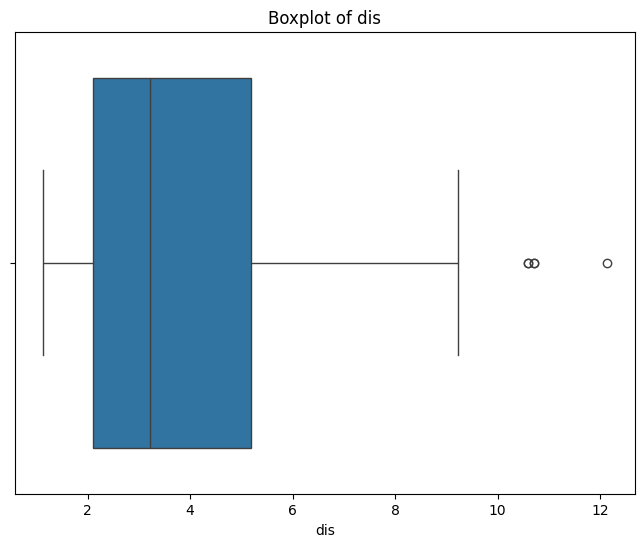

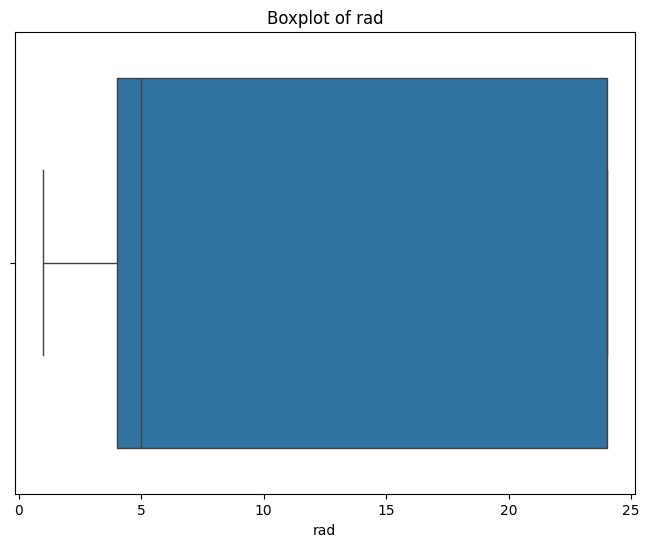

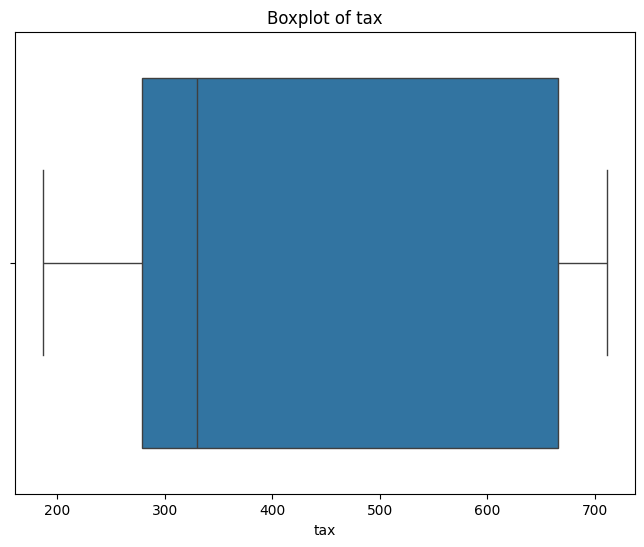

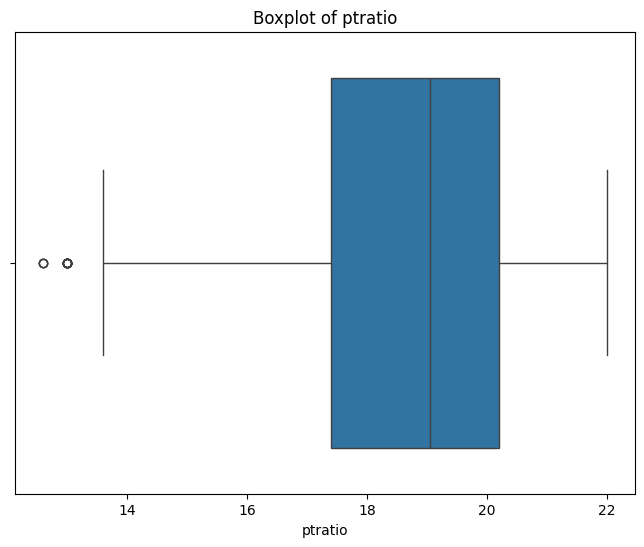

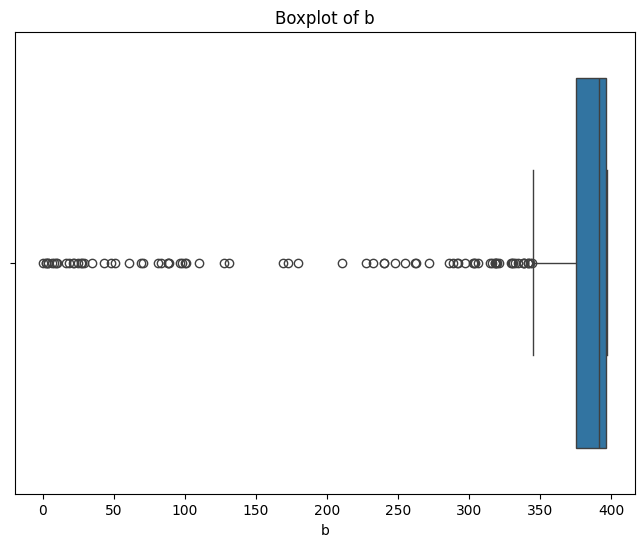

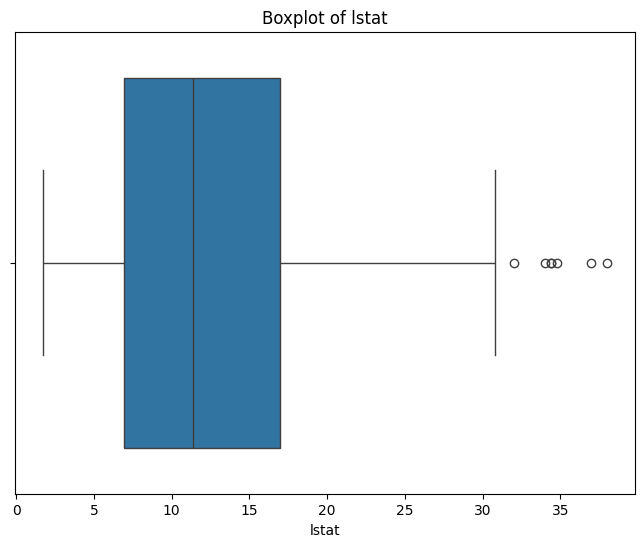

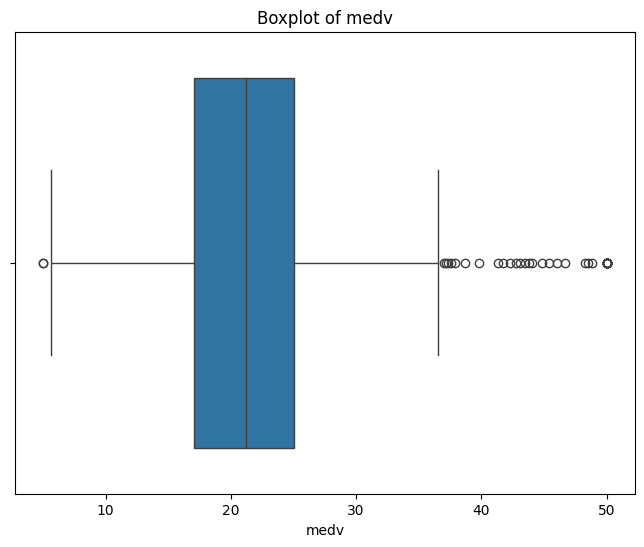

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in houses.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=houses[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [37]:
for column in houses.columns:
    Q1 = houses[column].quantile(0.25)
    Q3 = houses[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    upper_outliers = houses[houses[column] > upper_bound]
    lower_outliers = houses[houses[column] < lower_bound]
    upper_outliers = upper_bound
    lower_outliers = lower_bound

In [38]:
null_counts = houses.isnull().sum()
print(null_counts)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


<Axes: >

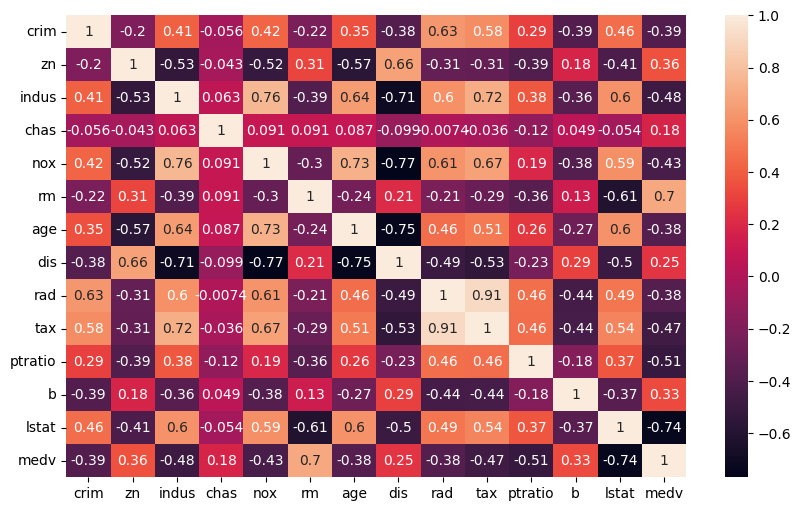

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(houses.corr(), annot=True)

In [40]:
x= houses.drop(['medv'], axis=1)
y= houses['medv']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 24.291119474973478


In [57]:
r_squared = model.score(x_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.6687594935356326


In [58]:
r_squared = model.score(x_train, y_train)
print(f"R-squared: {r_squared}") #increased accuracy 9 percent

R-squared: 0.7508856358979673


In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
model.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(x_test)


In [65]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 24.291119474973478


In [66]:
r_squared = model.score(x_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.6687594935356326


In [68]:
r_squared = model.score(x_train, y_train)
print(f"R-squared: {r_squared}") #increased accuracy 9 percent

R-squared: 0.7508856358979673


In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [70]:
model = DecisionTreeRegressor(random_state=42)

In [71]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
y_pred = model.predict(x_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)

In [80]:
r_squared = model.score(x_test, y_test)
print(f"R-squared: {r_squared}") #increased 15 percent

R-squared: 0.8579634380978161


In [93]:
input_data = (0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9)  # Replace with actual feature values
input_data_as_numpy_array = np.asarray(input_data)
prediction = model.predict(input_data_as_numpy_array.reshape(1, -1))
print("predicted house price:", prediction)

predicted house price: [21.9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
